# [Hands on Signal Processing with Python Tutorial](https://towardsdatascience.com/hands-on-signal-processing-with-python-9bda8aad39de)

[Hourly Energy Consumption Dataset](https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption)

In [56]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import pywt
import matplotlib.colors as mcolors

Text(0, 0.5, 'MW Energy Consumption')

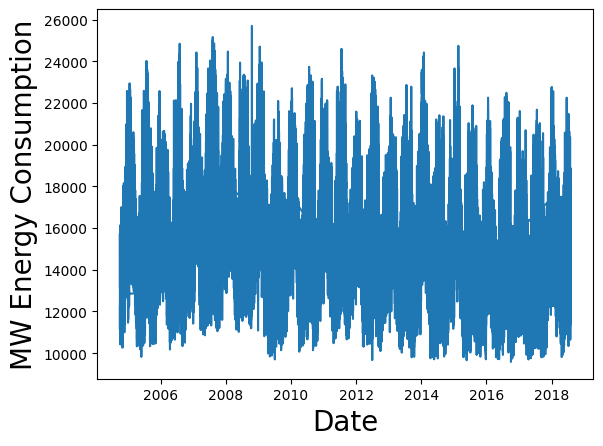

In [40]:
# Data Pre Processing
data_directory = './Kaggle_Datasets/archive/'

data_fft = pd.read_csv(data_directory + 'AEP_hourly.csv')
y = np.array(data_fft.AEP_MW)
x = data_fft.index
date_array = pd.to_datetime(data_fft.Datetime)
plt.plot(date_array, y)
plt.xlabel('Date', fontsize=20)
plt.ylabel('MW Energy Consumption', fontsize=20)


Text(0, 0.5, 'Temperature')

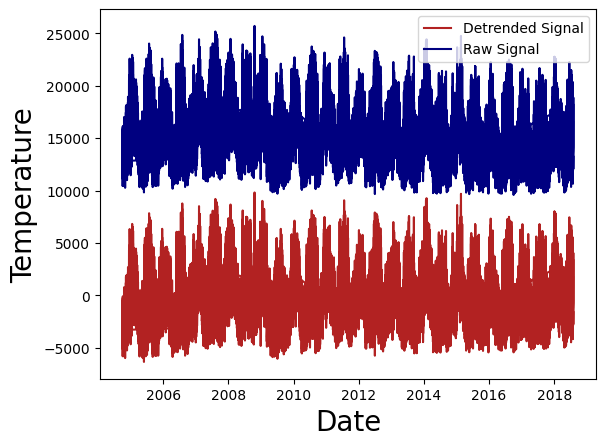

In [62]:
# There is an observable trend and non-zero mean in the data. 
# This is correctable using 'detrend'.

y_detrend = signal.detrend(y)
plt.plot(date_array, y_detrend, color='firebrick', label='Detrended Signal')
plt.plot(date_array, y, color='navy', label='Raw Signal')
plt.legend()
plt.xlabel('Date', fontsize=20)
plt.ylabel('Temperature', fontsize=20)

## Frequency Analysis

(0.0, 200.0)

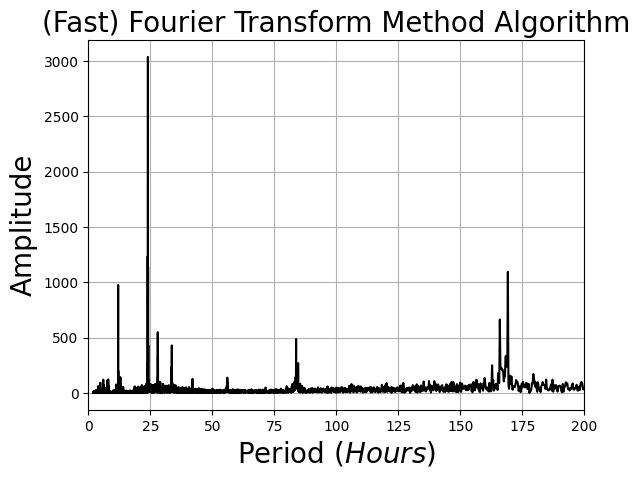

In [69]:
FFT = np.fft.fft(y_detrend)
half_length_of_the_FFT = int(len(FFT)/2)
f_nat = 1
frequencies = np.linspace(10**-12, f_nat/2, half_length_of_the_FFT, endpoint=True)
period=1.0/(frequencies) # This is the period
absolute_FFT=np.abs(FFT)

# There is a periodicity of 12 hours, 1 day, and 80 hours
plt.plot(period, 2*absolute_FFT[0:half_length_of_the_FFT]/len(period), color='black')
plt.xlabel('Period ($Hours$)', fontsize=20)
plt.ylabel('Amplitude', fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm', fontsize=20)
plt.grid(True)
plt.xlim(0, 200)

In [70]:
# Sorting the peaks and printing the corresponding indices:
fft_abs = 2*absolute_FFT[0:half_length_of_the_FFT]/len(period)
fft_abs = pd.DataFrame(fft_abs, columns = ['Amplitude'])
fft_sorted = fft_abs.sort_values(by='Amplitude', ascending=False).head(20)
fft_sorted


,Amplitude
5054,3037.558970
28,2556.509851
27,1636.961921
5068,1235.815611
5040,1137.886002
5055,1105.313718
717,1094.463940
10108,975.280091
10109,932.572475
14,895.208752


In [65]:
# Print the indices in 'number of days' from hours
fft_sorted.index/24

Index([ 210.58333333333334,  1.1666666666666667,               1.125,
        211.16666666666666,               210.0,             210.625,
                    29.875,   421.1666666666667,   421.2083333333333,
        0.5833333333333334,  1.0833333333333333,  210.54166666666666,
        1.0416666666666667,  30.458333333333332,  210.04166666666666,
        180.70833333333334,             421.125,  209.95833333333334,
        60.333333333333336, 0.16666666666666666],
      dtype='float64')

In [66]:
# 2.4 Noise Filtering (Fourier Transform)

# Defining the filtering function
def fft_filter(threshold):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(period)
    fft_tof[fft_tof_abs<=threshold]=0
    return fft_tof

In [67]:
# Showing the plots at different thresholds values
# Defining the amplitude filtering function
def fft_filter_amp(threshold):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(period)
    fft_tof_abs[fft_tof_abs<threshold]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

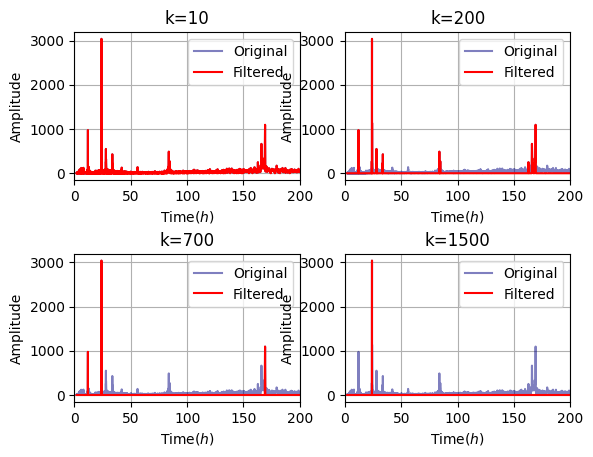

In [68]:
K_plot=[10, 200, 700, 1500]
j=0
for k in K_plot:
    j=j+1
    plt.subplot(2, 2, j)
    plt.title('k=%i'%(k))
    plt.xlim(0,200)
    plt.plot(period, 2*absolute_FFT[0:int(len(FFT)/2.)]/len(period), color='navy', alpha=0.5, label='Original')
    plt.grid(True)
    plt.plot(period, fft_filter_amp(k), 'red', label='Filtered')
    plt.xlabel('Time($h$)')
    plt.ylabel('Amplitude')
    plt.legend()
plt.subplots_adjust(hspace=0.5)


In [45]:
def fft_filter(percent):
    threshold=percent*(2*absolute_FFT[0:int(len(FFT)/2.)]/len(period)).max()
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(period)
    fft_tof[fft_tof_abs<=threshold]=0
    return fft_tof

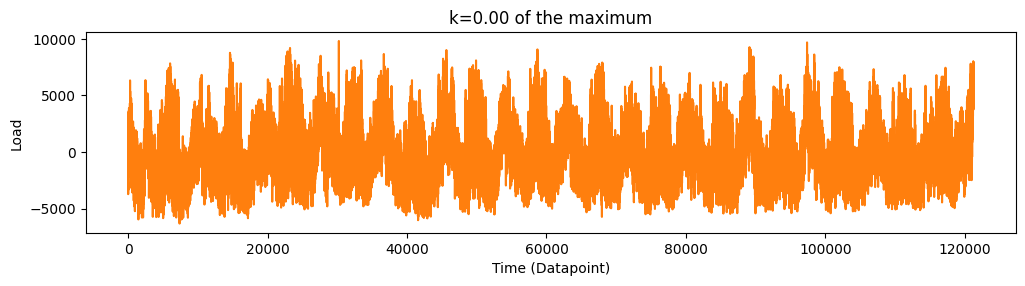

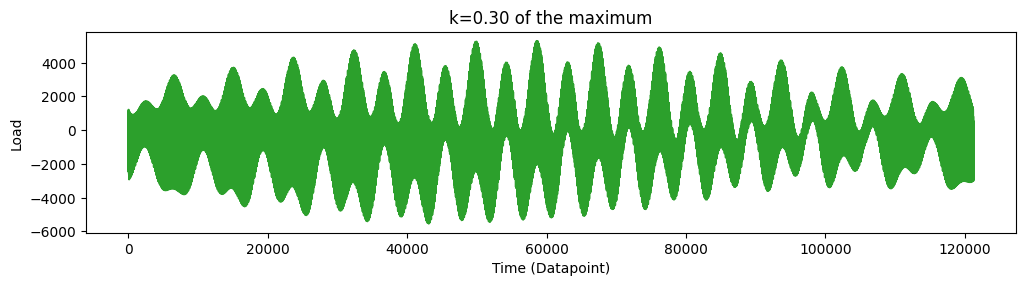

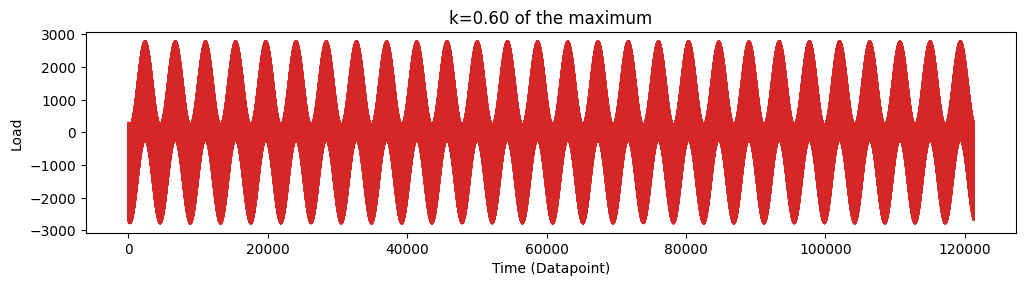

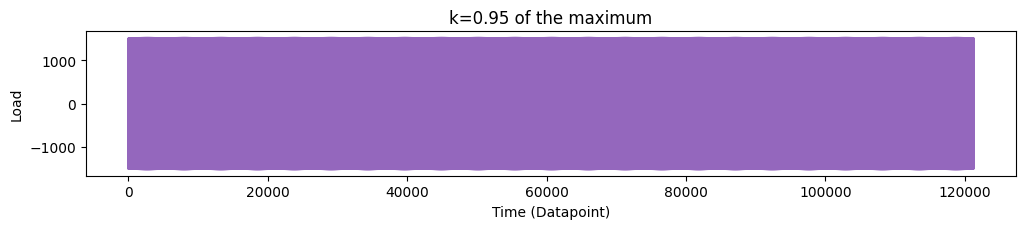

In [61]:
# Showing plots of different threshold values

colors = list(mcolors.TABLEAU_COLORS.keys())
K_plot_values = [0.0, 0.30, 0.60, 0.95]
j=0
for k in K_plot_values:
    j+=1
    plt.figure(figsize=(12,12))
    plt.subplot(4, 1, j)
    plt.plot(x, np.fft.ifft(fft_filter(k)), color=colors[j])
    plt.title('k=%.2f of the maximum' %(k))
    plt.xlabel('Time (Datapoint)')
    plt.ylabel('Load')
plt.subplots_adjust(hspace=0.8)